# **Data Science Lab for Smart Cities**<br/>
**Master's Degree in Data Science (A.Y. 2023/2024)**<br/>
**University of Milano - Bicocca**<br/>

In [ ]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  Download the ZIP file using wget
#!wget -P /content/drive/MyDrive/Smart_city_Data/ https://bostonopendata-boston.opendata.arcgis.com/api/download/v1/items/9a3a8c427add450eaf45a470245680fc/shapefile?layers=5


In [ ]:
# unzip
#!unzip -q /content/drive/MyDrive/Data_smart_city/Police_Districts.zip -d /content/drive/MyDrive/Data_smart_city/unzip_police_districts/


In [ ]:
! pip install pyrosm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp310-cp310-linux_x86_64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.7 MB/s eta 0:00:00
  Created wheel for pyrosm: filename=pyrosm-0.6.2-cp310-cp310-linux_x86_64.whl size=7462836 sha256=dc071afb446b1167e5321073f100c0d177a39341106562b92f979617df9a2b8f
  Stored in directory: /root/.cache/pip/wheels/18/21/22/b07b96a708420e351c553188667cfd6ebc7e78a011a8708cf4
  Created wheel for cykhash: filename=cykhash-2.0.1-cp310-cp310-linux_x86_64.whl size=3365963 sha256=f4f0fc9a9c72071126cf55ca5d84534ef27f722cab691a5b87d7c81fe9c3aad9


In [ ]:
import pandas as pd
import geopandas
import folium
import chardet
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import seaborn as sns
#from pyrosm import OSM

from folium import GeoJson
import geopandas as gpd
import matplotlib.colors as mcolors

# Descriptive statistics

In [ ]:
boston_pc = pd.read_csv("/content/drive/MyDrive/Data_smart_city/Boston_property_crimes")
boston_pc.head()

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0      I182080049          1402          Vandalism   
1      I182080042           706         Auto Theft   
2      I182080029           613            Larceny   
3      I182080027           619            Larceny   
4      I182080016          1402          Vandalism   

                 OFFENSE_DESCRIPTION DISTRICT  REPORTING_AREA  \
0                          VANDALISM      C11           351.0   
1  AUTO THEFT - MOTORCYCLE / SCOOTER      E13           582.0   
2                LARCENY SHOPLIFTING       D4           146.0   
3                 LARCENY ALL OTHERS       B2           294.0   
4                          VANDALISM      C11           405.0   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0  2018-10-02 20:40:00  2018     10     Tuesday    20  Part Two   
1  2018-10-01 20:00:00  2018     10      Monday    20  Part One   
2  2018-10-03 19:09:00  2018     10   Wednesday    19  Part One   
3  2018-10-03 18:53:00  2018     10   Wednesday    18  Part One   
4           2018-09-30  2018      9      Sunday     0  Part Two   

           STREET        Lat       Long                     Location  
0  DORCHESTER AVE  42.299197 -71.060470  (42.29919694, -71.06046974)  
1       BYNNER ST  42.323244 -71.108923  (42.32324363, -71.10892316)  
2  HUNTINGTON AVE  42.347972 -71.078496  (42.34797240, -71.07849582)  
3        AKRON ST  42.325794 -71.085638  (42.32579408, -71.08563758)  
4   WASHINGTON ST  42.272345 -71.068718  (42.27234506, -71.06871774)

In [ ]:
# SELECT
year_type = boston_pc[['YEAR', 'OFFENSE_CODE_GROUP']]

# Group by the date and count the appearances of each DISTRICT
q = year_type.groupby(['YEAR', 'OFFENSE_CODE_GROUP']).size().reset_index(name='count')

# Pivot the DataFrame
pivot_df = q.pivot_table(index='OFFENSE_CODE_GROUP', columns='YEAR', values='count', fill_value=0)

# Flatten the column headers
pivot_df.columns.name = None
pivot_df.reset_index(inplace=True)

pivot_df = pivot_df[~pivot_df['OFFENSE_CODE_GROUP'].str.contains('Arson|Burglary - No Property Taken')]

pivot_df


OFFENSE_CODE_GROUP    2015    2016    2017    2018
1                  Auto Theft   934.0  1408.0  1310.0   964.0
3         Commercial Burglary   253.0   425.0   426.0   234.0
4                     Larceny  4912.0  7603.0  7560.0  5744.0
5  Larceny From Motor Vehicle  2040.0  3286.0  2989.0  2186.0
6              Other Burglary   107.0   132.0   130.0    90.0
7     Property Related Damage   135.0   277.0   273.0   198.0
8        Residential Burglary  1414.0  1774.0  1519.0   985.0
9                   Vandalism  2662.0  4846.0  4650.0  3083.0

## Crime count by category

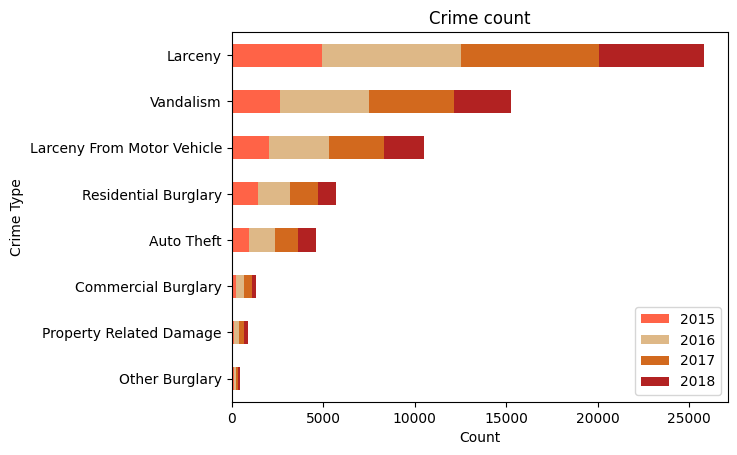

In [ ]:
## plot
sort_col = [2015]
sorted_ = pivot_df.sort_values(by= sort_col, ascending=False)
colors = ['tomato','burlywood',"chocolate",'firebrick']
# Plotting the sorted DataFrame
sorted_.plot(kind='barh', stacked=True, legend=True, color= colors)
plt.title('Crime count')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.yticks(ticks=range(len(sorted_)), labels=sorted_['OFFENSE_CODE_GROUP'])
plt.gca().invert_yaxis()

In [ ]:
pivot_df

OFFENSE_CODE_GROUP    2015    2016    2017    2018
1                  Auto Theft   934.0  1408.0  1310.0   964.0
3         Commercial Burglary   253.0   425.0   426.0   234.0
4                     Larceny  4912.0  7603.0  7560.0  5744.0
5  Larceny From Motor Vehicle  2040.0  3286.0  2989.0  2186.0
6              Other Burglary   107.0   132.0   130.0    90.0
7     Property Related Damage   135.0   277.0   273.0   198.0
8        Residential Burglary  1414.0  1774.0  1519.0   985.0
9                   Vandalism  2662.0  4846.0  4650.0  3083.0

## Crime count by the day of the week

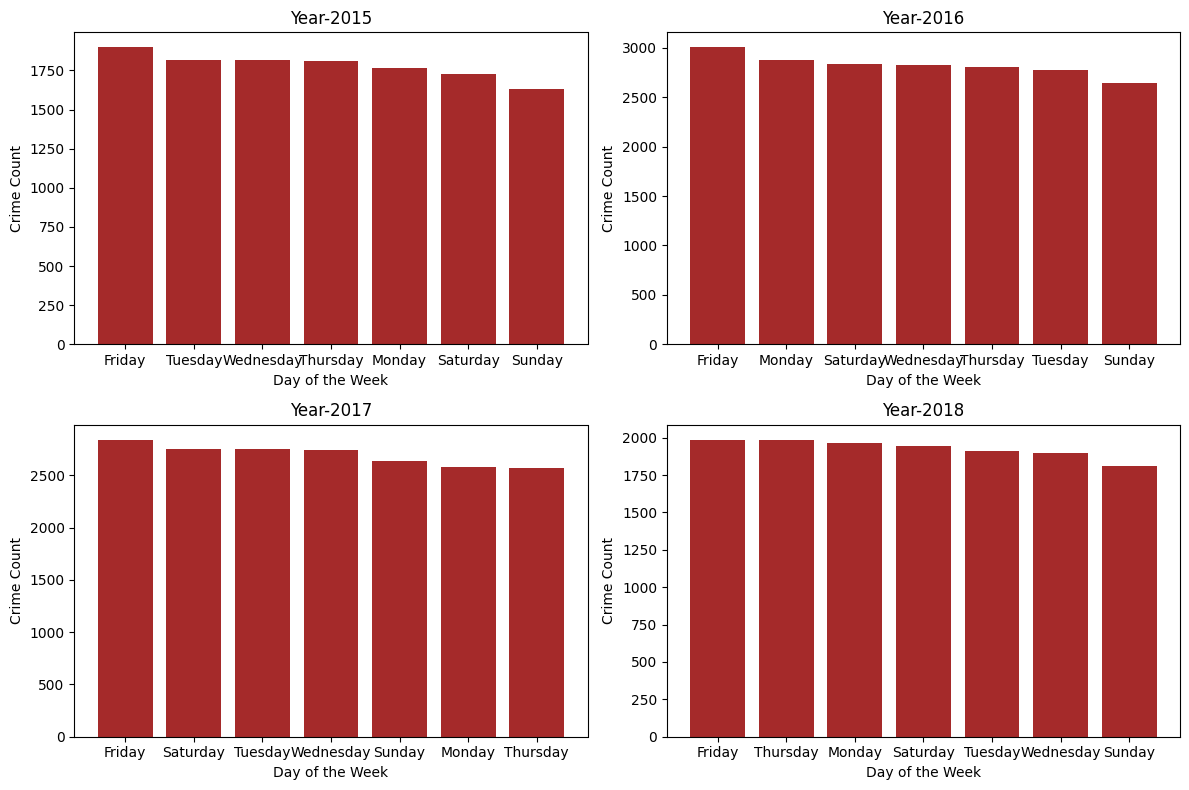

In [ ]:
yr18 = boston_pc[boston_pc["YEAR"]==2018]
yr18_week = yr18[['YEAR', 'DAY_OF_WEEK']]
yr18_week = yr18_week.groupby(['YEAR', 'DAY_OF_WEEK']).size().reset_index(name='crime_count')

yr17 = boston_pc[boston_pc["YEAR"]==2017]
yr17_week = yr17[['YEAR', 'DAY_OF_WEEK']]
yr17_week = yr17_week.groupby(['YEAR', 'DAY_OF_WEEK']).size().reset_index(name='crime_count')

yr16 = boston_pc[boston_pc["YEAR"]==2016]
yr16_week = yr16[['YEAR', 'DAY_OF_WEEK']]
yr16_week = yr16_week.groupby(['YEAR', 'DAY_OF_WEEK']).size().reset_index(name='crime_count')

yr15 = boston_pc[boston_pc["YEAR"]==2015]
yr15_week = yr15[['YEAR', 'DAY_OF_WEEK']]
yr15_week = yr15_week.groupby(['YEAR', 'DAY_OF_WEEK']).size().reset_index(name='crime_count')

# sort
yr15_week = yr15_week.sort_values(by='crime_count', ascending=False)
yr16_week = yr16_week.sort_values(by='crime_count', ascending=False)
yr17_week = yr17_week.sort_values(by='crime_count', ascending=False)
yr18_week = yr18_week.sort_values(by='crime_count', ascending=False)


# plots

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].bar(yr15_week['DAY_OF_WEEK'], yr15_week['crime_count'], color='brown')
axs[0, 0].set_title('Year-2015')

axs[0, 1].bar(yr16_week['DAY_OF_WEEK'], yr16_week['crime_count'], color='brown')
axs[0, 1].set_title('Year-2016')

axs[1, 0].bar(yr17_week['DAY_OF_WEEK'], yr17_week['crime_count'], color='brown')
axs[1, 0].set_title('Year-2017')

axs[1, 1].bar(yr18_week['DAY_OF_WEEK'], yr18_week['crime_count'], color='brown')
axs[1, 1].set_title('Year-2018')

# Adding labels and titles for each subplot
for ax in axs.flat:
    ax.set(xlabel='Day of the Week', ylabel='Crime Count')

# Adjust layout
plt.tight_layout()

# Step 3: Display the chart
plt.show()


## Crime count by hour

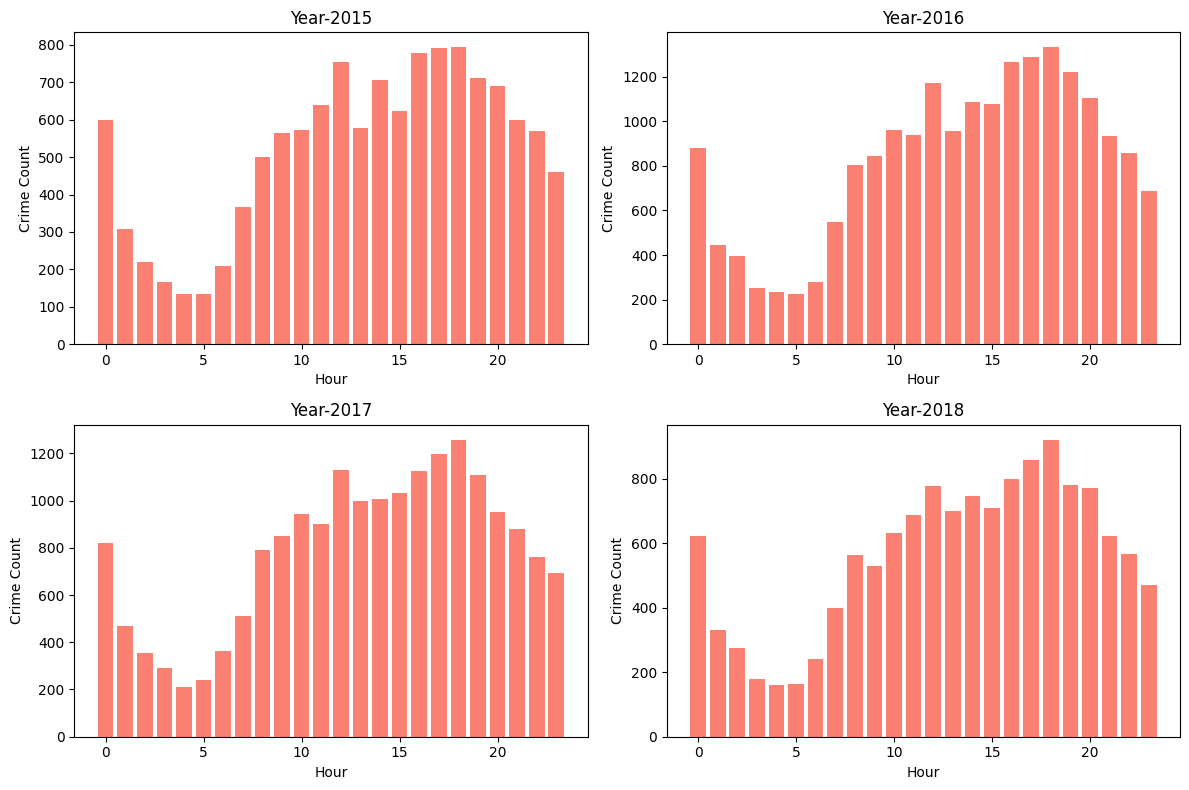

In [ ]:
yr18 = boston_pc[boston_pc["YEAR"]==2018]
yr18_HOUR = yr18[['YEAR', 'HOUR']]
yr18_HOUR = yr18_HOUR.groupby(['YEAR', 'HOUR']).size().reset_index(name='crime_count')

yr17 = boston_pc[boston_pc["YEAR"]==2017]
yr17_HOUR = yr17[['YEAR', 'HOUR']]
yr17_HOUR = yr17_HOUR.groupby(['YEAR', 'HOUR']).size().reset_index(name='crime_count')

yr16 = boston_pc[boston_pc["YEAR"]==2016]
yr16_HOUR = yr16[['YEAR', 'HOUR']]
yr16_HOUR = yr16_HOUR.groupby(['YEAR', 'HOUR']).size().reset_index(name='crime_count')

yr15 = boston_pc[boston_pc["YEAR"]==2015]
yr15_HOUR = yr15[['YEAR', 'HOUR']]
yr15_HOUR = yr15_HOUR.groupby(['YEAR', 'HOUR']).size().reset_index(name='crime_count')


# Sort
yr15_HOUR = yr15_HOUR.sort_values(by='crime_count', ascending=False)
yr16_HOUR = yr16_HOUR.sort_values(by='crime_count', ascending=False)
yr17_HOUR = yr17_HOUR.sort_values(by='crime_count', ascending=False)
yr18_HOUR = yr18_HOUR.sort_values(by='crime_count', ascending=False)

# Step 2: Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotting each subplot with sorted data and inverted axes
axs[0, 0].bar(yr15_HOUR['HOUR'], yr15_HOUR['crime_count'], color='salmon')
axs[0, 0].set_title('Year-2015')

axs[0, 1].bar(yr16_HOUR['HOUR'], yr16_HOUR['crime_count'], color='salmon')
axs[0, 1].set_title('Year-2016')


axs[1, 0].bar(yr17_HOUR['HOUR'], yr17_HOUR['crime_count'], color='salmon')
axs[1, 0].set_title('Year-2017')

axs[1, 1].bar(yr18_HOUR['HOUR'], yr18_HOUR['crime_count'], color='salmon')
axs[1, 1].set_title('Year-2018')


# Adding labels and titles for each subplot
for ax in axs.flat:
    ax.set(xlabel='Hour', ylabel='Crime Count')

# Adjust layout
plt.tight_layout()

# Step 3: Display the chart
plt.show()


# Spatial Analysis

In [ ]:
# Read the shapefile
gdf = gpd.read_file("/content/drive/MyDrive/Data_smart_city/unzip_police_districts/Police_Districts.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())

   OBJECTID DISTRICT   ID BPDGIS_GIS  DISTRICT_ DISTRICT__    ShapeSTAre  \
0         1      A15  A15          A         15         15  3.798392e+07   
1         2       A7   A7          A          7         07  1.401151e+08   
2         3       A1   A1          A          1         01  4.449734e+07   
3         4       C6   C6          C          6         06  1.236919e+08   
4         5       D4   D4          D          4         04  6.999546e+07   

      ShapeSTLen                                           geometry  
0   57616.007190  MULTIPOLYGON (((771204.900 2967614.950, 771205...  
1  138468.216080  MULTIPOLYGON (((792187.300 2969573.400, 792187...  
2   48916.392280  POLYGON ((777233.200 2959748.000, 777315.300 2...  
3   93389.518748  POLYGON ((779407.000 2954363.800, 779390.500 2...  
4   41016.808977  POLYGON ((771263.359 2955490.741, 771418.507 2...  


In [ ]:
# SELECT date
year_district = boston_pc[['YEAR', 'DISTRICT']]
#date_district['date'] = pd.to_datetime(date_district['date'].str.strip())

# count
count_by_year = year_district.groupby(['YEAR', 'DISTRICT']).size().reset_index(name='crime_count')


## Crime count by district for 2015 - 2018 years

In [ ]:
year_2018 = count_by_year[count_by_year['YEAR']==2018]

merged_gdf = gdf.merge(year_2018, on="DISTRICT")
m = folium.Map(location=[42.3, -71], tiles="CartoDB Positron", zoom_start=12)

folium.Choropleth(
    geo_data=merged_gdf,
    name="choropleth",
    data=merged_gdf,
    columns=["DISTRICT", "crime_count"],  # The column with regions and the data to visualize
    key_on="feature.properties.DISTRICT",  # The key in the GeoJSON properties
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime count per District - Year 2018"
).add_to(m)

#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/crime_map_2018.html'

# Save the map
#m.save(map_save_path)
m

In [ ]:
year_2017 = count_by_year[count_by_year['YEAR']==2017]

merged_gdf = gdf.merge(year_2017, on="DISTRICT")
m = folium.Map(location=[42.3, -71], tiles="CartoDB Positron", zoom_start=12)

folium.Choropleth(
    geo_data=merged_gdf,
    name="choropleth",
    data=merged_gdf,
    columns=["DISTRICT", "crime_count"],  # The column with regions and the data to visualize
    key_on="feature.properties.DISTRICT",  # The key in the GeoJSON properties
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime count per District - Year 2017"
).add_to(m)

#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/crime_map_2017.html'

# Save the map
#m.save(map_save_path)
m

In [ ]:
year_2016 = count_by_year[count_by_year['YEAR']==2016]

merged_gdf = gdf.merge(year_2016, on="DISTRICT")
m = folium.Map(location=[42.3, -71], tiles="CartoDB Positron", zoom_start=12)

folium.Choropleth(
    geo_data=merged_gdf,
    name="choropleth",
    data=merged_gdf,
    columns=["DISTRICT", "crime_count"],  # The column with regions and the data to visualize
    key_on="feature.properties.DISTRICT",  # The key in the GeoJSON properties
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime count per District - Year 2016"
).add_to(m)

#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/crime_map_2016.html'

# Save the map
#m.save(map_save_path)
m

In [ ]:
year_2015 = count_by_year[count_by_year['YEAR']==2015]

merged_gdf = gdf.merge(year_2015, on="DISTRICT")
m = folium.Map(location=[42.3, -71], tiles="CartoDB Positron", zoom_start=12)

folium.Choropleth(
    geo_data=merged_gdf,
    name="choropleth",
    data=merged_gdf,
    columns=["DISTRICT", "crime_count"],  # The column with regions and the data to visualize
    key_on="feature.properties.DISTRICT",  # The key in the GeoJSON properties
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime count per District - Year 2015"
).add_to(m)

#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/crime_map_2015.html'

# Save the map
#m.save(map_save_path)
m

## Crime count by District - Year 2018

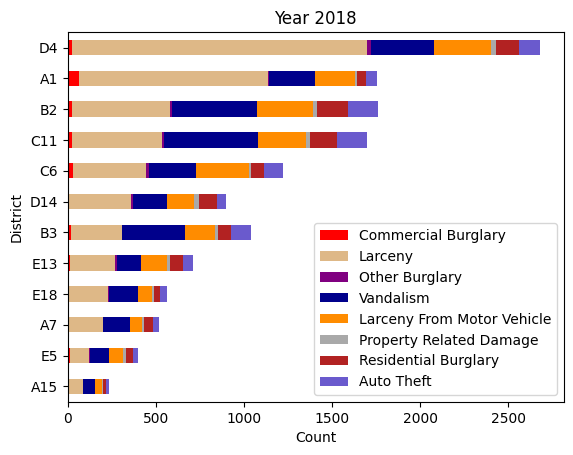

In [ ]:
yr18 = boston_pc[boston_pc["YEAR"]==2018]
yr18_district = yr18[['OFFENSE_CODE_GROUP','DISTRICT']]
yr18_district  = yr18_district.groupby(['OFFENSE_CODE_GROUP','DISTRICT']).size().reset_index(name='count')
# Pivot the DataFrame
yr18_district_pivot_df = yr18_district.pivot_table(index='DISTRICT', columns='OFFENSE_CODE_GROUP', values='count', fill_value=0)

# Flatten the column headers
yr18_district_pivot_df.columns.name = None
yr18_district_pivot_df.reset_index(inplace=True)
# SORT
sort_col = ["Larceny"]
yr18_district_pivot_df = yr18_district_pivot_df[[ "Commercial Burglary","DISTRICT","Larceny","Other Burglary","Vandalism","Larceny From Motor Vehicle", "Property Related Damage","Residential Burglary",
                                             "Auto Theft"]]
sorted_yr18_district = yr18_district_pivot_df.sort_values(by= sort_col, ascending=False)

colors = ['r','burlywood', 'purple', 'darkblue', 'darkorange', 'darkgrey','firebrick','slateblue']
# colors = ['r','darkblue','burlywood','slateblue','darkorange','darkgrey','purple','firebrick']
# Plotting the sorted DataFrame
sorted_yr18_district.plot(kind='barh', stacked=True, legend=True, color= colors)
plt.title('Year 2018')
plt.xlabel('Count')
plt.ylabel('District')
plt.yticks(ticks=range(len(sorted_yr18_district)), labels=sorted_yr18_district['DISTRICT'])
plt.gca().invert_yaxis()

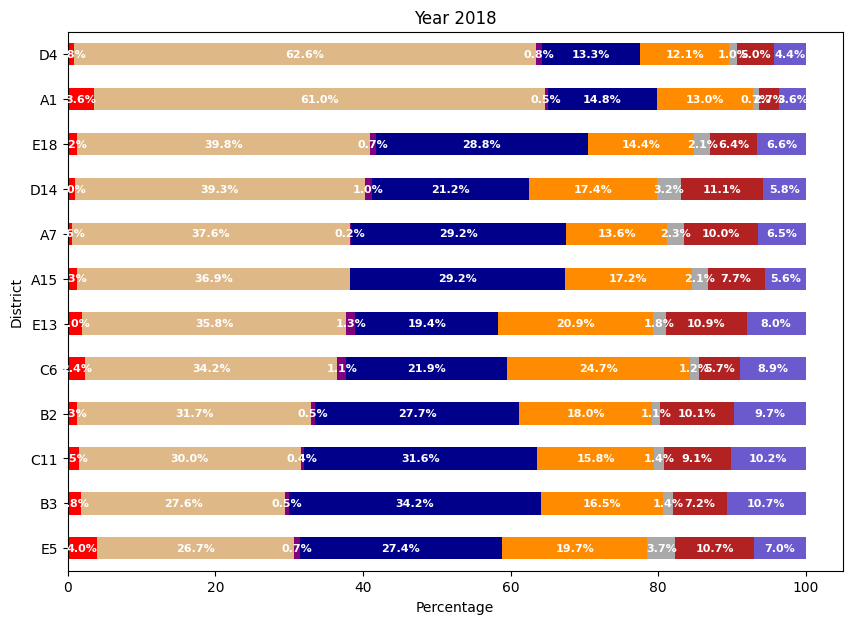

In [ ]:
# Normalize the data (excluding the 'Territory' column)
yr18_district_pivot_df_normalized = yr18_district_pivot_df.set_index('DISTRICT')
yr18_district_pivot_df_normalized = yr18_district_pivot_df_normalized.div(yr18_district_pivot_df_normalized.sum(axis=1), axis=0) * 100
## plot
sort_col = ['Larceny']
yr18_district_pivot_df_normalized = yr18_district_pivot_df_normalized.sort_values(by= sort_col, ascending=False)

colors = ['r','burlywood', 'purple', 'darkblue', 'darkorange', 'darkgrey','firebrick','slateblue']
# Plotting the normalized DataFrame
ax = yr18_district_pivot_df_normalized.plot(kind='barh', stacked=True, legend=False, color=colors, figsize=(10, 7))
plt.title('Year 2018')
plt.xlabel('Percentage')
plt.ylabel('District')
plt.gca().invert_yaxis()

# Annotate each bar segment with the percentage
for i, territory in enumerate(yr18_district_pivot_df_normalized.index):
    for j, (method, value) in enumerate(yr18_district_pivot_df_normalized.loc[territory].items()):
        if value > 0:  # Only annotate if the value is greater than 0
            ax.text(value / 2 + yr18_district_pivot_df_normalized.iloc[i, :j].sum(), i, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

plt.show()

## Districts

<Axes: >

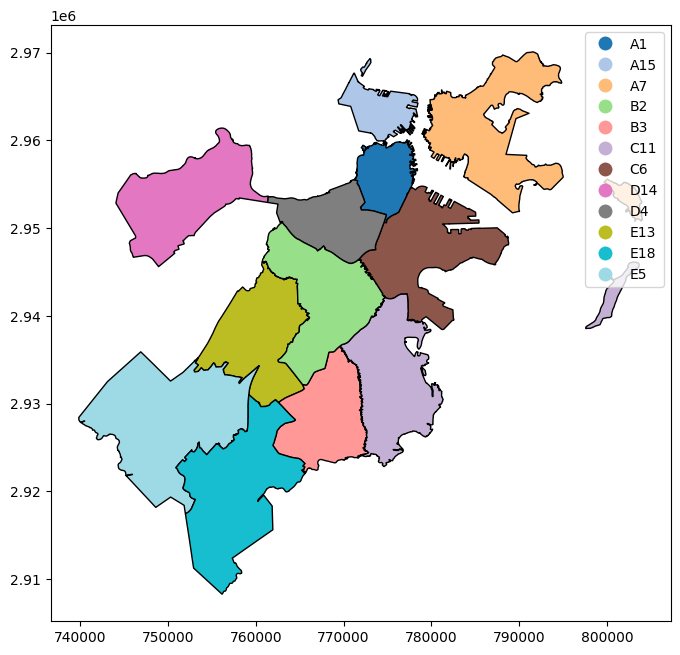

In [ ]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Plotting
gdf.plot(column='DISTRICT', ax=ax, legend=True, cmap='tab20', edgecolor='black')

In [ ]:
geo_pc = gpd.GeoDataFrame(
    boston_pc,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(boston_pc.Long, boston_pc.Lat))

geo_pc.tail(3)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
64640   I110551302-00           623            Larceny   
64641   I110261417-00           619            Larceny   
64642   I100636670-00           629            Larceny   

                   OFFENSE_DESCRIPTION DISTRICT  REPORTING_AREA  \
64640  LARCENY SHOPLIFTING $50 TO $199       D4           171.0   
64641        LARCENY OTHER $200 & OVER       B2           324.0   
64642        LARCENY OTHER $50 TO $199       D4           285.0   

          OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
64640  2015-07-22 22:00:00  2015      7   Wednesday    22  Part One   
64641           2016-07-29  2016      7      Friday     0  Part One   
64642  2016-06-05 17:23:00  2016      6      Sunday    17  Part One   

             STREET        Lat       Long                     Location  \
64640  HARRISON AVE  42.335560 -71.074364  (42.33555954, -71.07436364)   
64641    BOWDOIN ST  42.307038 -71.066153  (42.30703835, -71.06615319)   
64642   COVENTRY ST  42.336951 -71.085748  (42.33695098, -71.08574813)   

                         geometry  
64640  POINT (-71.07436 42.33556)  
64641  POINT (-71.06615 42.30704)  
64642  POINT (-71.08575 42.33695)

In [ ]:
# 2018
yr_2018 = geo_pc[geo_pc['YEAR'] == 2018 ]

#Arson
#Auto Theft
#Burglary - No Property Taken
#Commercial Burglary
#Larceny
#Larceny From Motor Vehicle
#Residential Burglary
#Vandalism
#Other Burglary
#Property Related Damage


Auto_theft_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Auto Theft']
Larceny_Motor_Vehicle_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Larceny From Motor Vehicle']

Larceny_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Larceny']

Burglary_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Burglary - No Property Taken']
Com_Burglary_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Commercial Burglary']
Resi_Burglary_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Residential Burglary']
Other_Burglary_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Other Burglary']

Property_Damage_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Property Related Damage']
Arson_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Arson']
Vandalism_2018 = yr_2018[yr_2018['OFFENSE_CODE_GROUP'] == 'Vandalism']


## Crime concentrated Areas

<ipython-input-54-fbd71f16e61c>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=m_df, x='x', y='y', ax=ax[1], cmap='Reds', shade=True, alpha=0.5, label='Crime Density')


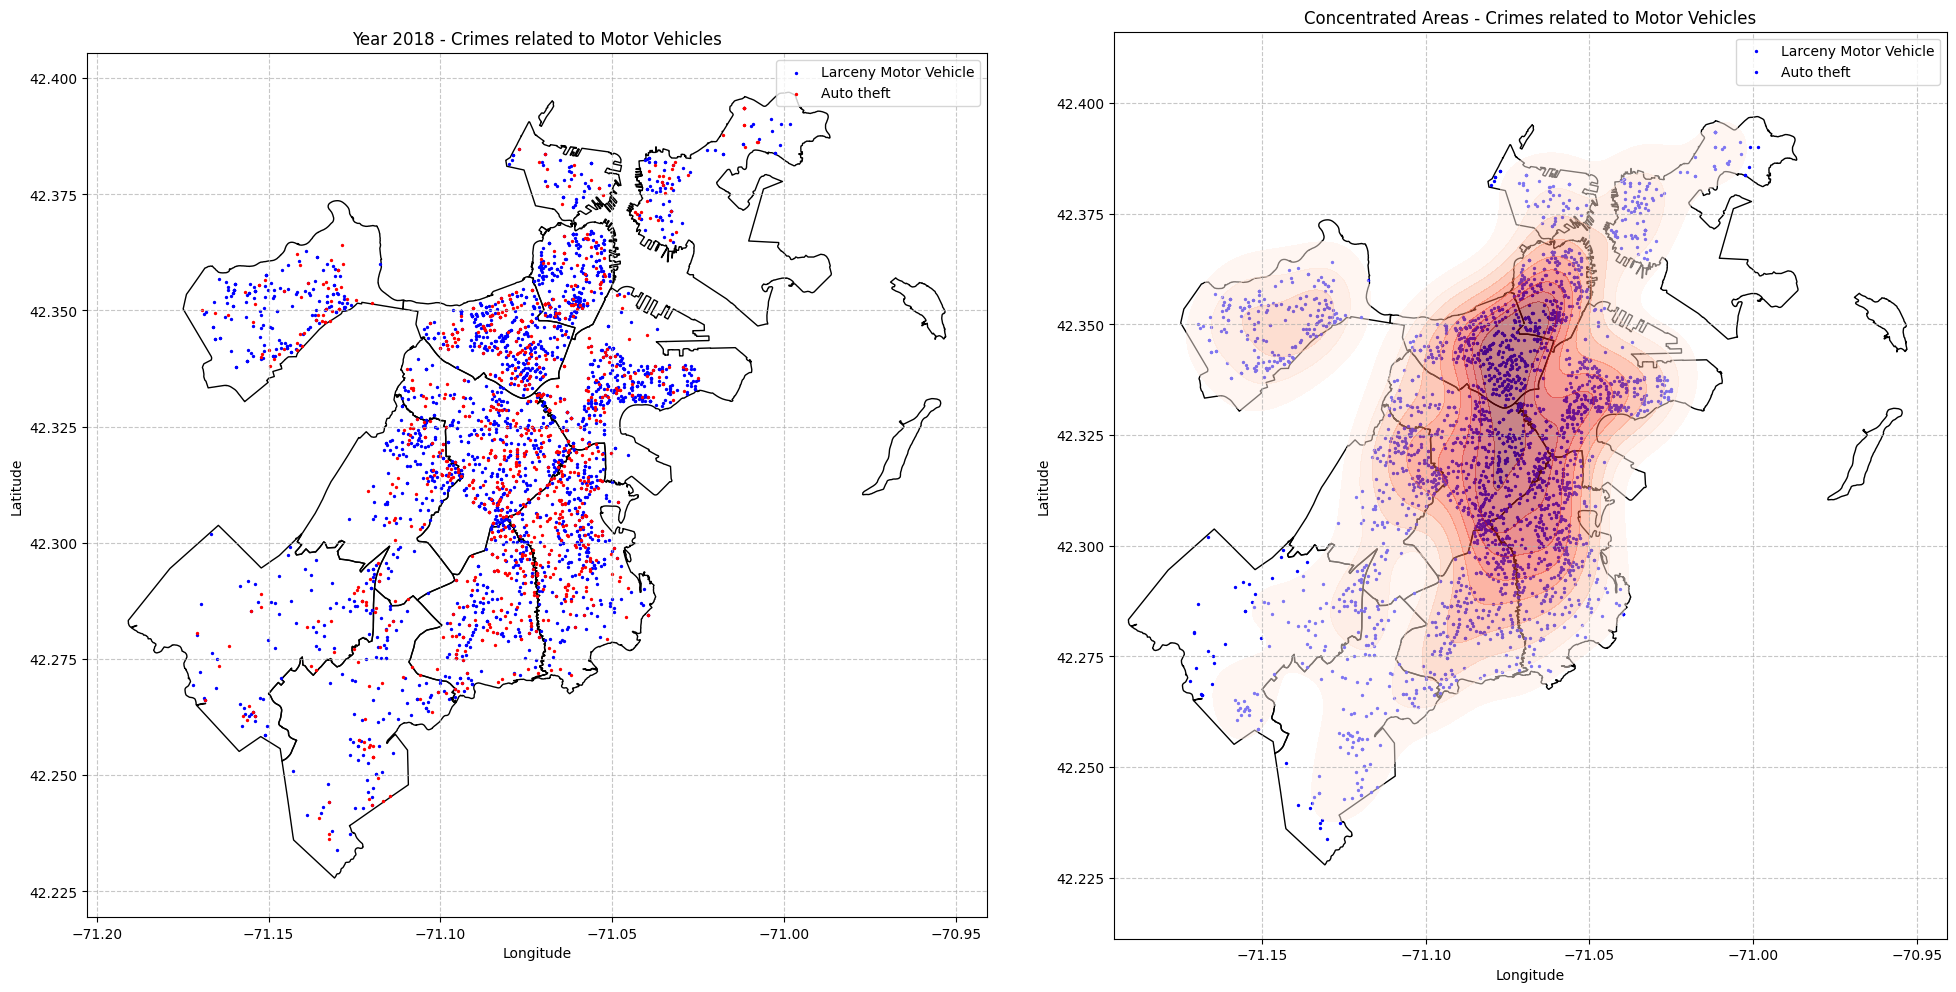

In [ ]:

# plots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# First plot
gdf.to_crs(epsg=4326).plot(ax=ax[0], legend=True, edgecolor='k', facecolor='none')
Larceny_Motor_Vehicle_2018.plot(ax=ax[0], color="blue", markersize=2, label='Larceny Motor Vehicle')
Auto_theft_2018.plot(ax=ax[0], color="red", markersize=2, label='Auto theft')
ax[0].set_title('Year 2018 - Crimes related to Motor Vehicles')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()

# Second plot
gdf.to_crs(epsg=4326).plot(ax=ax[1], edgecolor='black', facecolor='none')
Larceny_Motor_Vehicle_2018.plot(ax=ax[1], color="blue", markersize=2, label='Larceny Motor Vehicle')
Auto_theft_2018.plot(ax=ax[1], color="blue", markersize=2, label='Auto theft')


merged_df = pd.concat([Larceny_Motor_Vehicle_2018, Auto_theft_2018])
m_df = merged_df.to_crs(epsg=4326).copy()
m_df['x'] = m_df.geometry.x
m_df['y'] = m_df.geometry.y

# KDE Plot
sns.kdeplot(data=m_df, x='x', y='y', ax=ax[1], cmap='Reds', shade=True, alpha=0.5, label='Crime Density')

ax[1].set_title('Concentrated Areas - Crimes related to Motor Vehicles')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()

plt.show()


<ipython-input-55-1f53dd6af2e8>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=m_df, x='x', y='y', ax=ax[1], cmap='Reds', shade=True, alpha=0.5, label='Crime Density')


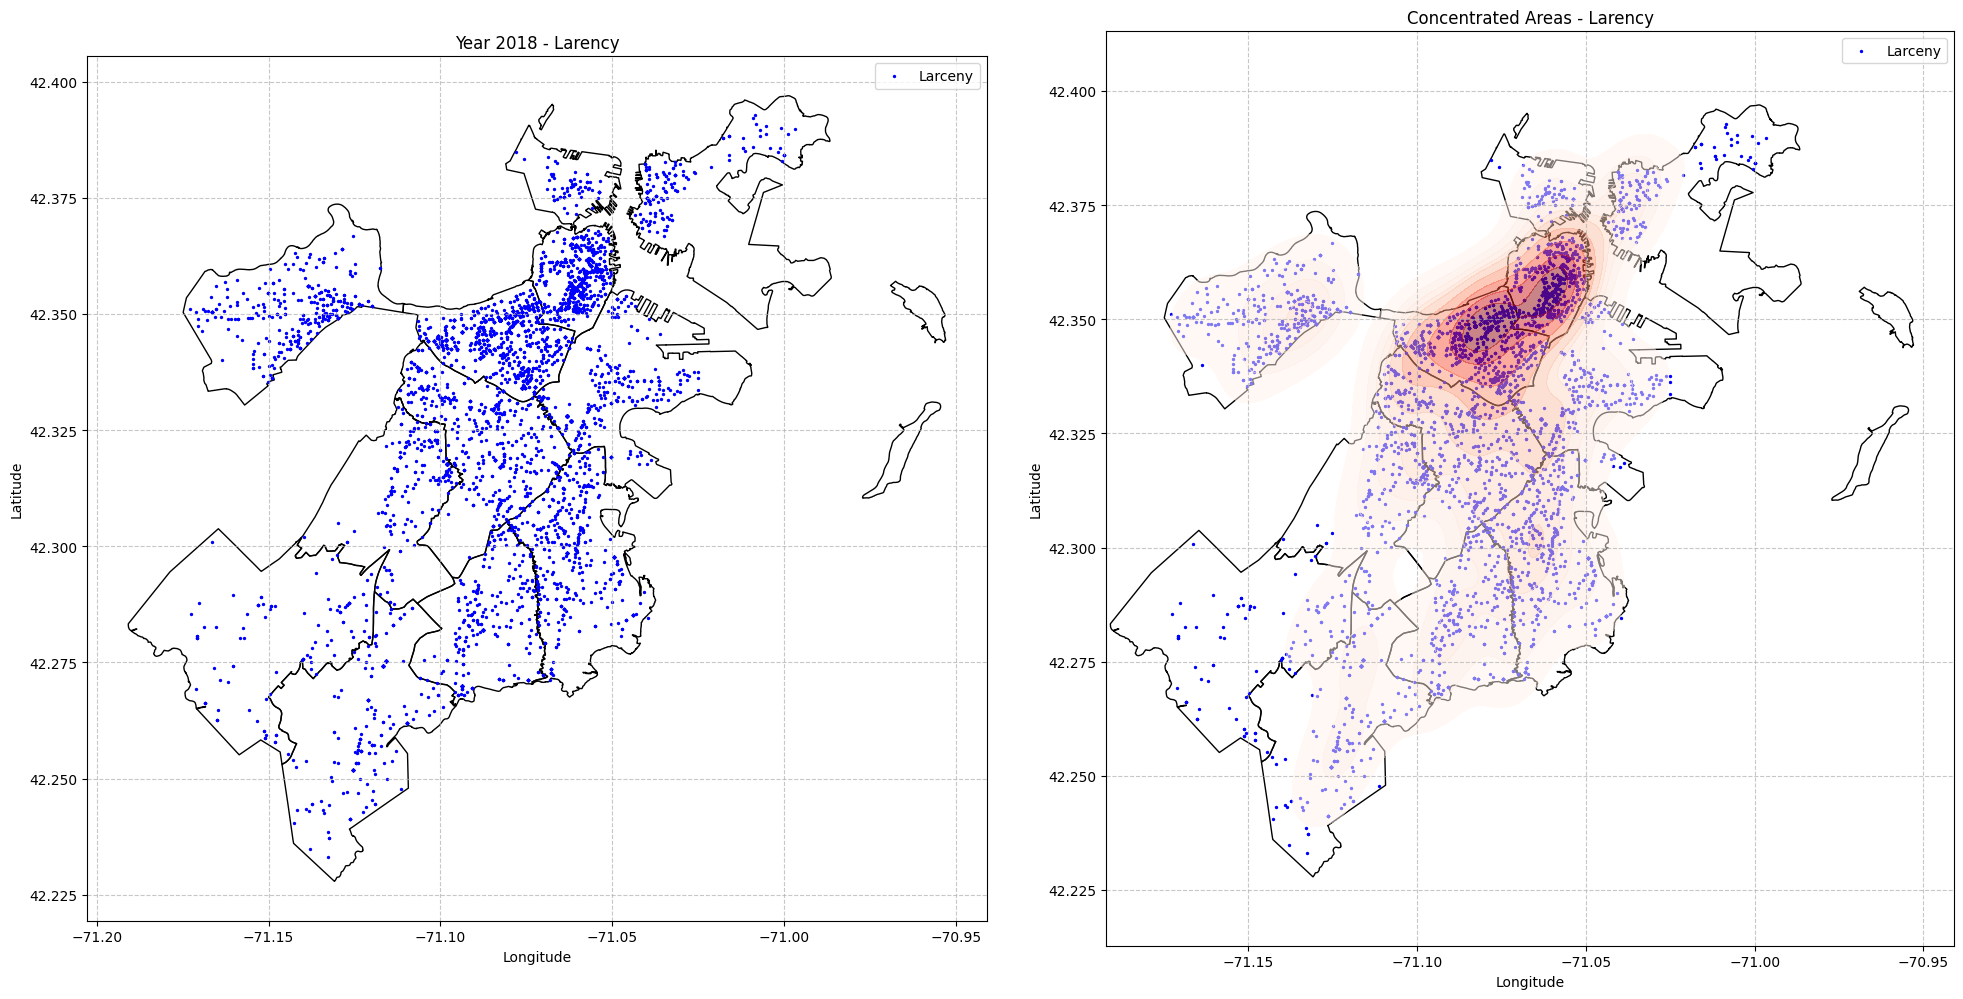

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# First plot
gdf.to_crs(epsg=4326).plot(ax=ax[0], legend=True, edgecolor='k', facecolor='none')
Larceny_2018.plot(ax=ax[0], color="blue", markersize=2, label='Larceny')

ax[0].set_title('Year 2018 - Larency')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()

# Second plot
gdf.to_crs(epsg=4326).plot(ax=ax[1], edgecolor='black', facecolor='none')
Larceny_2018.plot(ax=ax[1], color="blue", markersize=2, label='Larceny')

# Merge the data for the KDE plot
merged_df = Larceny_2018
m_df = merged_df.to_crs(epsg=4326).copy()
m_df['x'] = m_df.geometry.x
m_df['y'] = m_df.geometry.y

# kde
sns.kdeplot(data=m_df, x='x', y='y', ax=ax[1], cmap='Reds', shade=True, alpha=0.5, label='Crime Density')

#
ax[1].set_title('Concentrated Areas - Larency')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()
plt.tight_layout()

plt.show()


<ipython-input-56-58d12855b04b>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=m_df, x='x', y='y', ax=ax[1], cmap='Reds', shade=True, alpha=0.5, label='Crime Density')


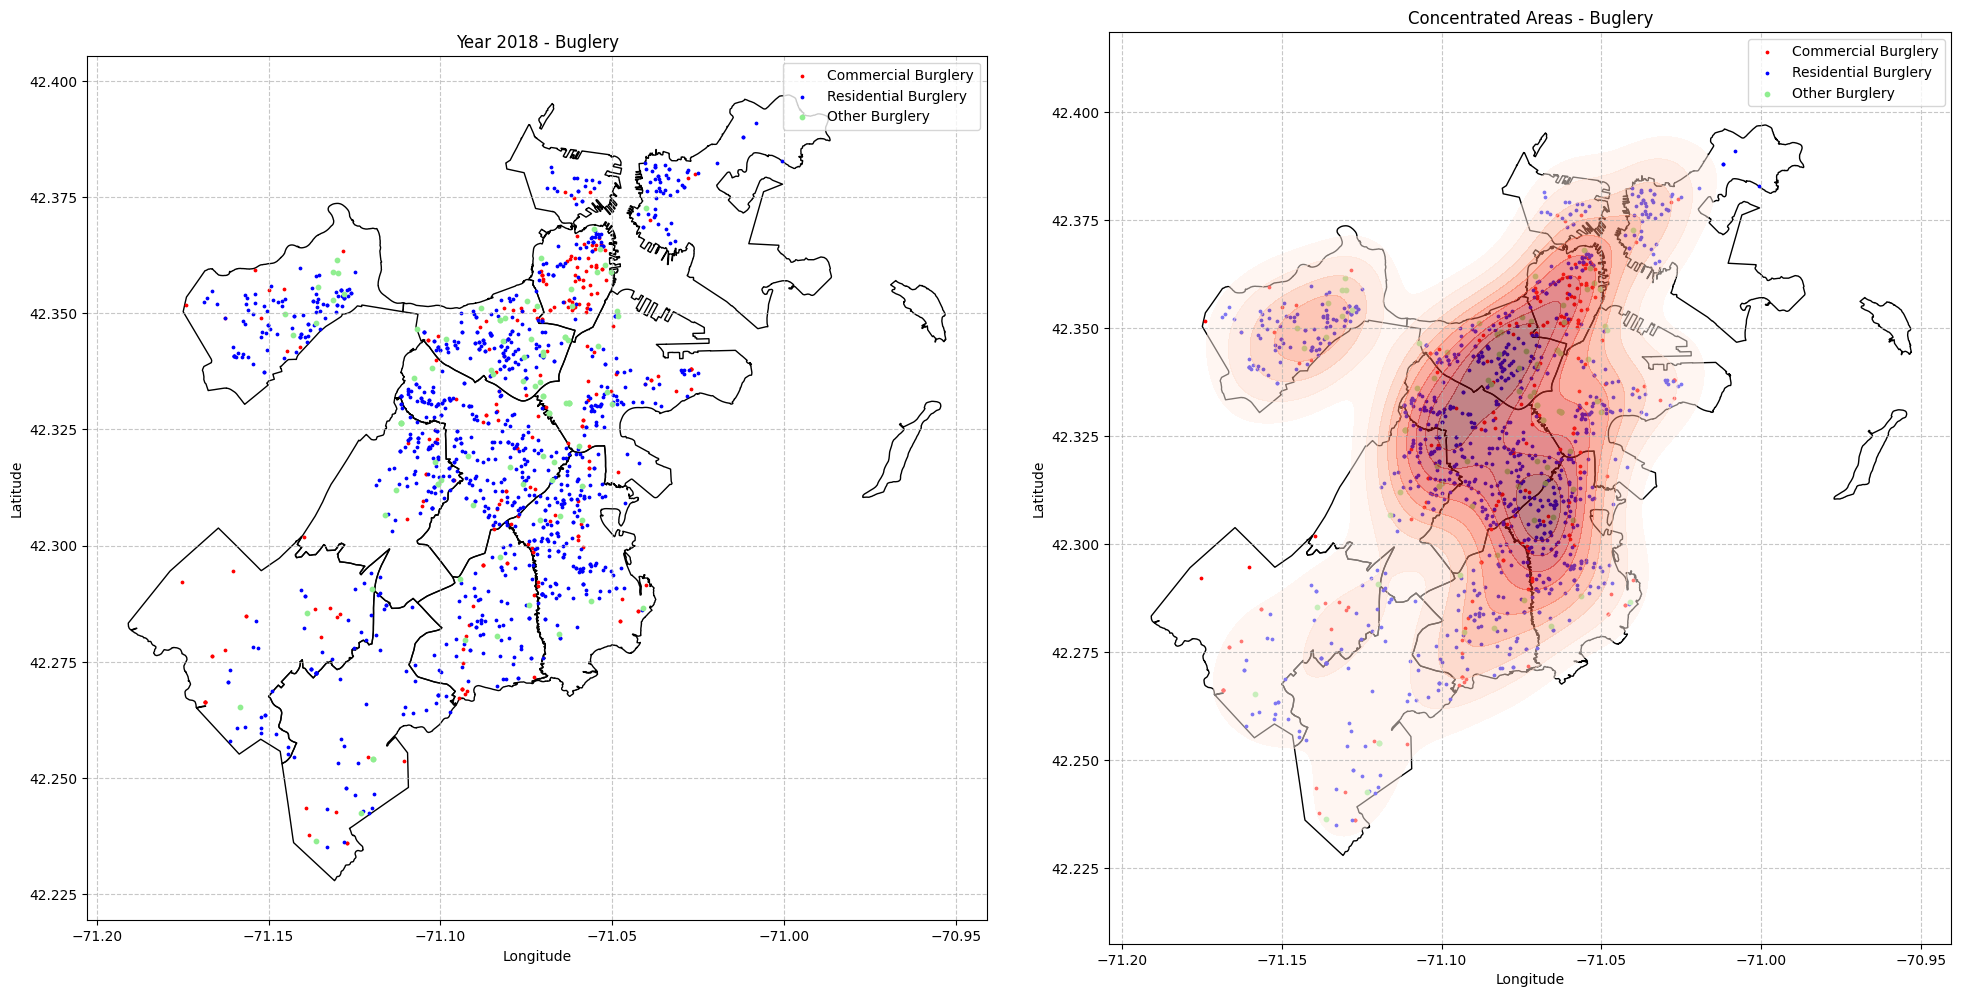

In [ ]:

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# First plot
gdf.to_crs(epsg=4326).plot(ax=ax[0], legend=True, edgecolor='k', facecolor='none')
Com_Burglary_2018.plot(ax=ax[0], color="red", markersize=3, label='Commercial Burglery')
Resi_Burglary_2018.plot(ax=ax[0], color="blue", markersize=3, label='Residential Burglery')
Other_Burglary_2018.plot(ax=ax[0], color="lightgreen", markersize=10, label='Other Burglery')
ax[0].set_title('Year 2018 - Buglery')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()


# Second plot
gdf.to_crs(epsg=4326).plot(ax=ax[1], edgecolor='black', facecolor='none')
Com_Burglary_2018.plot(ax=ax[1], color="red", markersize=3, label='Commercial Burglery')
Resi_Burglary_2018.plot(ax=ax[1], color="blue", markersize=3, label='Residential Burglery')
Other_Burglary_2018.plot(ax=ax[1], color="lightgreen", markersize=10, label='Other Burglery')

# Merge the data for the KDE plot
merged_df_1 = pd.concat([Burglary_2018, Com_Burglary_2018])
merged_df_2= pd.concat([Resi_Burglary_2018, Other_Burglary_2018])
merged_df = pd.concat([merged_df_1, merged_df_2])

# Convert to DataFrame for seaborn KDE plot

m_df = merged_df.to_crs(epsg=4326).copy()
m_df['x'] = m_df.geometry.x
m_df['y'] = m_df.geometry.y

# KDE Plot for bus stops
sns.kdeplot(data=m_df, x='x', y='y', ax=ax[1], cmap='Reds', shade=True, alpha=0.5, label='Crime Density')

# Setting title and labels for the second plot
ax[1].set_title('Concentrated Areas - Buglery')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

<ipython-input-57-8fe9fb37527a>:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=m_df, x='x', y='y', ax=ax[1], cmap='Reds', shade=True, alpha=0.5, label='Crime Density')


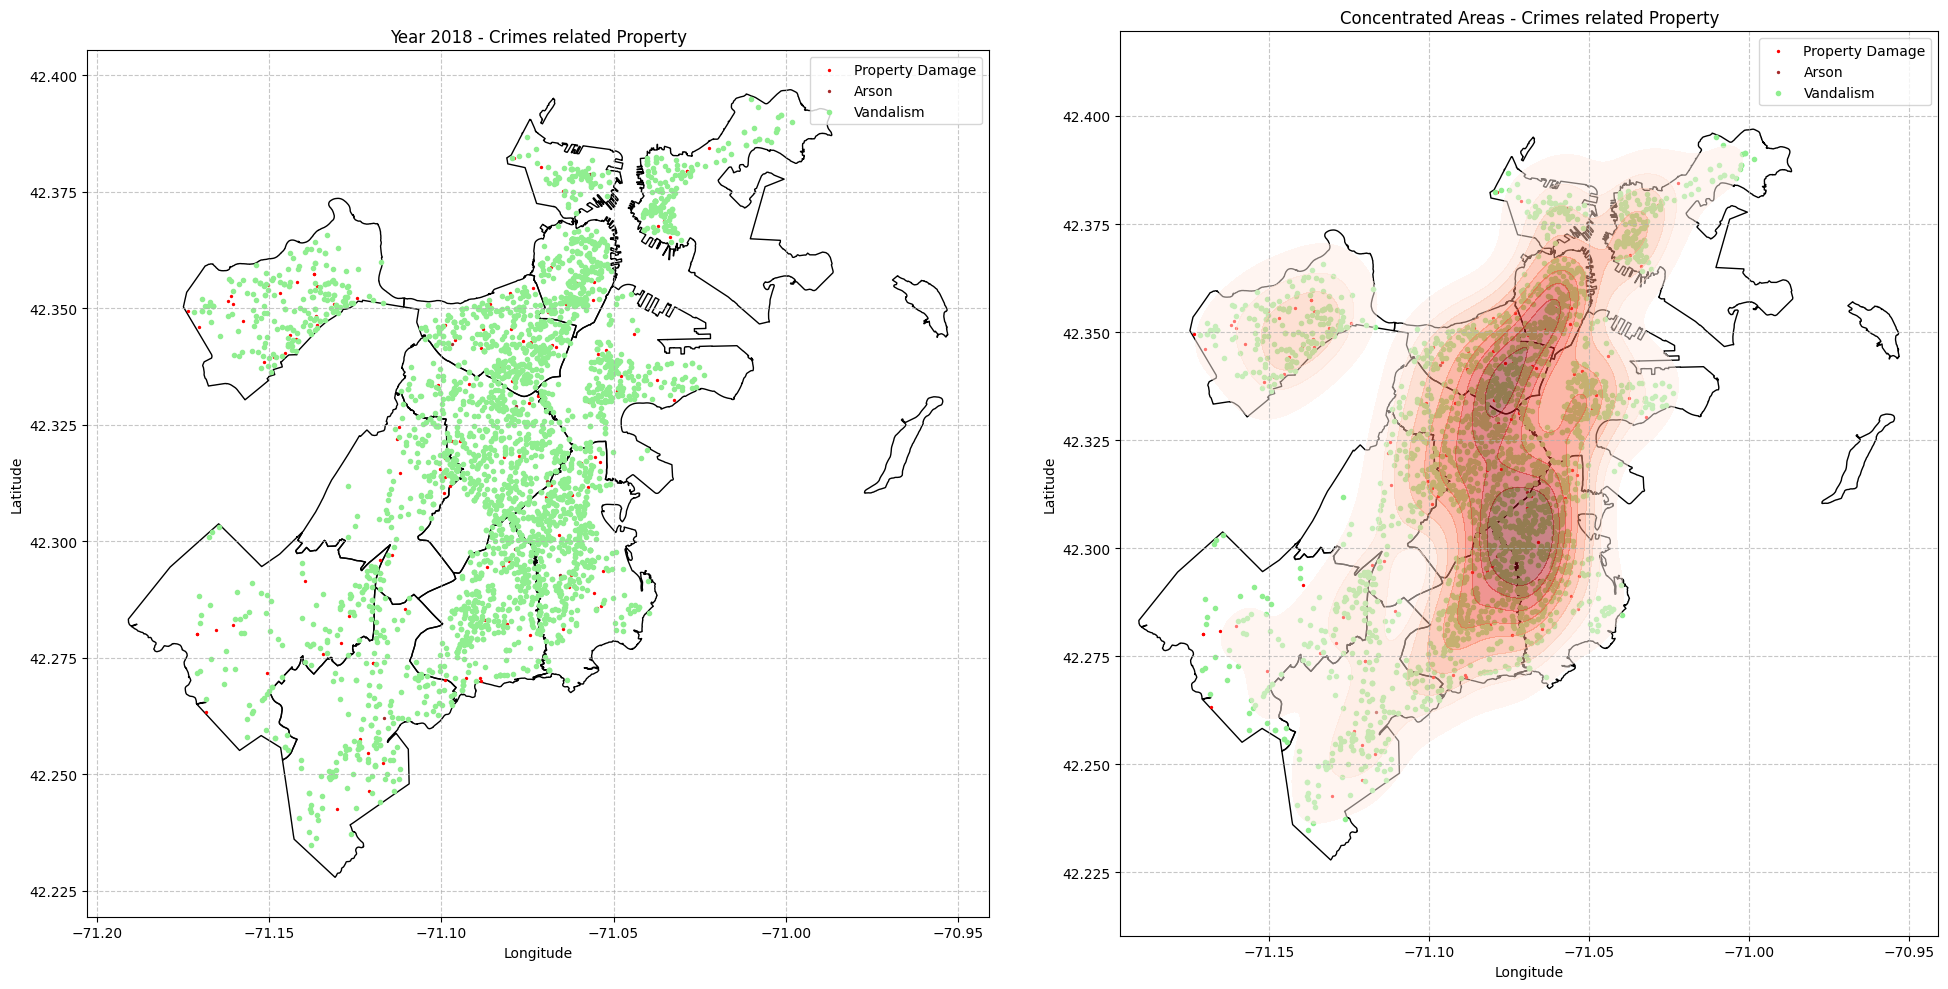

In [ ]:

# plots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# First plot
gdf.to_crs(epsg=4326).plot(ax=ax[0], legend=True, edgecolor='k', facecolor='none')
Property_Damage_2018.plot(ax=ax[0], color="red", markersize=2, label='Property Damage')
Arson_2018.plot(ax=ax[0], color="brown", markersize=2, label='Arson')
Vandalism_2018.plot(ax=ax[0], color="lightgreen", markersize=9, label='Vandalism')
ax[0].set_title('Year 2018 - Crimes related Property')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()

# Second plot
gdf.to_crs(epsg=4326).plot(ax=ax[1], edgecolor='black', facecolor='none')
Property_Damage_2018.plot(ax=ax[1], color="red", markersize=2, label='Property Damage')
Arson_2018.plot(ax=ax[1], color="brown", markersize=2, label='Arson')
Vandalism_2018.plot(ax=ax[1], color="lightgreen", markersize=9, label='Vandalism')

merged_df_11 = pd.concat([Property_Damage_2018, Arson_2018])
merged_df = pd.concat([merged_df_11, Vandalism_2018])
m_df = merged_df.to_crs(epsg=4326).copy()
m_df['x'] = m_df.geometry.x
m_df['y'] = m_df.geometry.y

# KDE Plot
sns.kdeplot(data=m_df, x='x', y='y', ax=ax[1], cmap='Reds', shade=True, alpha=0.5, label='Crime Density')

ax[1].set_title('Concentrated Areas - Crimes related Property')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()

plt.show()


## Crime Hotspots - 2018

In [ ]:
yr_ra = boston_pc[['YEAR', 'DISTRICT','Lat','Long']]
count_by_area = yr_ra.groupby(['YEAR', 'DISTRICT','Lat','Long']).size().reset_index(name='crime_count')
t = count_by_area[count_by_area["DISTRICT"]=="A1"]
t= t[t["YEAR"] == 2018]
t = t.sort_values(by='crime_count', ascending=False)
t = t.head(10)

In [ ]:
map = folium.Map(location=[t.Lat.mean(), t.Long.mean()], zoom_start=15, control_scale=True,
                 tiles="OpenStreetMap")


for index, location_info in t.iterrows():
    folium.Marker(
        [location_info["Lat"], location_info["Long"]],
        popup=f"Crime Count: {location_info['crime_count']}"
    ).add_to(map)

for index, location_info in t.iterrows():
    folium.Marker(
        [location_info["Lat"], location_info["Long"]],
       # popup=folium.Popup(f'Crime Count: {location_info["crime_count"]}', max_width=300),
        popup=f"Crime Count: {location_info['crime_count']}",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt; color: darkblue;">{location_info["crime_count"]}</div>',
        )
    ).add_to(map)

#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/a1_district_2018.html'
# Save the map
#map.save(map_save_path)
map

In [ ]:
yr_ra = boston_pc[['YEAR', 'DISTRICT','Lat','Long']]
count_by_area = yr_ra.groupby(['YEAR', 'DISTRICT','Lat','Long']).size().reset_index(name='crime_count')
t = count_by_area[count_by_area["DISTRICT"]=="D4"]
t= t[t["YEAR"] == 2018]
t = t.sort_values(by='crime_count', ascending=False)
t = t.head(10)

In [ ]:
map = folium.Map(location=[t.Lat.mean(), t.Long.mean()], zoom_start=15, control_scale=True,
                 tiles="OpenStreetMap")


for index, location_info in t.iterrows():
    folium.Marker(
        [location_info["Lat"], location_info["Long"]],
        popup=f"Crime Count: {location_info['crime_count']}"
    ).add_to(map)

for index, location_info in t.iterrows():
    folium.Marker(
        [location_info["Lat"], location_info["Long"]],
       # popup=folium.Popup(f'Crime Count: {location_info["crime_count"]}', max_width=300),
        popup=f"Crime Count: {location_info['crime_count']}",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt; color: darkblue;">{location_info["crime_count"]}</div>',
        )
    ).add_to(map)

#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/d4_district_2018.html'
# Save the map
#map.save(map_save_path)
map

In [ ]:
yr_ra = boston_pc[['YEAR', 'DISTRICT','Lat','Long']]
count_by_area = yr_ra.groupby(['YEAR', 'DISTRICT','Lat','Long']).size().reset_index(name='crime_count')
t = count_by_area[count_by_area["DISTRICT"]=="B2"]
t= t[t["YEAR"] == 2018]
t = t.sort_values(by='crime_count', ascending=False)
t = t.head(10)

In [ ]:
map = folium.Map(location=[t.Lat.mean(), t.Long.mean()], zoom_start=15, control_scale=True,
                 tiles="OpenStreetMap")


for index, location_info in t.iterrows():
    folium.Marker(
        [location_info["Lat"], location_info["Long"]],
        popup=f"Crime Count: {location_info['crime_count']}"
    ).add_to(map)

for index, location_info in t.iterrows():
    folium.Marker(
        [location_info["Lat"], location_info["Long"]],
       # popup=folium.Popup(f'Crime Count: {location_info["crime_count"]}', max_width=300),
        popup=f"Crime Count: {location_info['crime_count']}",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt; color: darkblue;">{location_info["crime_count"]}</div>',
        )
    ).add_to(map)

#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/b2_district_2018.html'
# Save the map
#map.save(map_save_path)
map

In [ ]:
yr_ra = boston_pc[['YEAR', 'DISTRICT','Lat','Long']]
count_by_area = yr_ra.groupby(['YEAR', 'DISTRICT','Lat','Long']).size().reset_index(name='crime_count')
t = count_by_area[count_by_area["DISTRICT"]=="C11"]
t= t[t["YEAR"] == 2018]
t = t.sort_values(by='crime_count', ascending=False)
t = t.head(10)

In [ ]:
map = folium.Map(location=[t.Lat.mean(), t.Long.mean()], zoom_start=15, control_scale=True,
                 tiles="OpenStreetMap")


for index, location_info in t.iterrows():
    folium.Marker(
        [location_info["Lat"], location_info["Long"]],
        popup=f"Crime Count: {location_info['crime_count']}"
    ).add_to(map)

for index, location_info in t.iterrows():
    folium.Marker(
        [location_info["Lat"], location_info["Long"]],
       # popup=folium.Popup(f'Crime Count: {location_info["crime_count"]}', max_width=300),
        popup=f"Crime Count: {location_info['crime_count']}",
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12pt; color: darkblue;">{location_info["crime_count"]}</div>',
        )
    ).add_to(map)

#map_save_path = '/content/drive/MyDrive/Data_smart_city/maps/c11_district_2018.html'
# Save the map
#map.save(map_save_path)
map

## Proximity Locations

In [ ]:
# Download file Boston, Suffolk County, Massachusetts, United States
#!wget -P /content/drive/MyDrive/Data_smart_city/   https://download.bbbike.org/osm/extract/planet_-71.195,42.214_-70.8,42.411.osm.pbf

In [ ]:
# Boston, Suffolk County, Massachusetts, United States
osm_file = "/content/drive/MyDrive/Data_smart_city/planet_-71.195,42.214_-70.8,42.411.osm.pbf"

# Initialize the OSM object with the file
osm = OSM(osm_file)

In [ ]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [ ]:
# Extract schools
schools = osm.get_pois(custom_filter={'amenity': ['school']})

# Extract parks
parks = osm.get_pois(custom_filter={'leisure': ['park']})

# Extract transportation hubs (e.g., train stations, bus stops)
transportation_hubs = osm.get_pois(custom_filter={'public_transport': ['station', 'stop_position']})

In [ ]:
schools.head(2)

lat         id visible  \
0  42.248199  257493925   False   
1  42.296928  257578075   False   

                                                tags  timestamp  version  \
0  {"addr:state":"MA","attribution":"Office of Ge...          0        0   
1  {"addr:state":"MA","attribution":"Office of Ge...          0        0   

   changeset        lon   addr:city addr:housenumber  ... school start_date  \
0        0.0 -71.117233      Boston               81  ...   None       None   
1        0.0 -71.080330  Dorchester              189  ...   None       None   

  wikipedia                    geometry osm_type addr:country building  \
0      None  POINT (-71.11723 42.24820)     node          NaN      NaN   
1      None  POINT (-71.08033 42.29693)     node          NaN      NaN   

  building:levels landuse source  
0             NaN     NaN    NaN  
1             NaN     NaN    NaN  

[2 rows x 30 columns]

In [ ]:
# Convert to GeoDataFrames
schools_gdf = gpd.GeoDataFrame(schools, geometry=gpd.points_from_xy(schools.lon, schools.lat))
parks_gdf = gpd.GeoDataFrame(parks, geometry=gpd.points_from_xy(parks.lon, parks.lat))
transportation_gdf = gpd.GeoDataFrame(transportation_hubs, geometry=gpd.points_from_xy(transportation_hubs.lon, transportation_hubs.lat))

In [ ]:
from shapely.ops import nearest_points

# Function to calculate the nearest distance
def calculate_nearest(crime_points, key_locations):
    distances = []
    for crime_point in geo_pc.geometry:
        nearest_geom = nearest_points(crime_point, key_locations.unary_union)[1]
        distance = crime_point.distance(nearest_geom)
        distances.append(distance)
    return distances

# Calculate distance to the nearest school, park, and transportation hub
geo_pc['distance_to_school'] = calculate_nearest(geo_pc, schools_gdf)
geo_pc['distance_to_park'] = calculate_nearest(geo_pc, parks_gdf)
geo_pc['distance_to_transportation'] = calculate_nearest(geo_pc, transportation_gdf)
geo_pc.head()

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0      I182080049          1402          Vandalism   
1      I182080042           706         Auto Theft   
2      I182080029           613            Larceny   
3      I182080027           619            Larceny   
4      I182080016          1402          Vandalism   

                 OFFENSE_DESCRIPTION DISTRICT  REPORTING_AREA  \
0                          VANDALISM      C11           351.0   
1  AUTO THEFT - MOTORCYCLE / SCOOTER      E13           582.0   
2                LARCENY SHOPLIFTING       D4           146.0   
3                 LARCENY ALL OTHERS       B2           294.0   
4                          VANDALISM      C11           405.0   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0  2018-10-02 20:40:00  2018     10     Tuesday    20  Part Two   
1  2018-10-01 20:00:00  2018     10      Monday    20  Part One   
2  2018-10-03 19:09:00  2018     10   Wednesday    19  Part One   
3  2018-10-03 18:53:00  2018     10   Wednesday    18  Part One   
4           2018-09-30  2018      9      Sunday     0  Part Two   

           STREET        Lat       Long                     Location  \
0  DORCHESTER AVE  42.299197 -71.060470  (42.29919694, -71.06046974)   
1       BYNNER ST  42.323244 -71.108923  (42.32324363, -71.10892316)   
2  HUNTINGTON AVE  42.347972 -71.078496  (42.34797240, -71.07849582)   
3        AKRON ST  42.325794 -71.085638  (42.32579408, -71.08563758)   
4   WASHINGTON ST  42.272345 -71.068718  (42.27234506, -71.06871774)   

                     geometry  distance_to_school  distance_to_park  \
0  POINT (-71.06047 42.29920)            0.001890          0.002418   
1  POINT (-71.10892 42.32324)            0.002678          0.012972   
2  POINT (-71.07850 42.34797)            0.002929          0.014241   
3  POINT (-71.08564 42.32579)            0.002754          0.019212   
4  POINT (-71.06872 42.27235)            0.002543          0.025865   

   distance_to_transportation  
0                    0.001237  
1                    0.005223  
2                    0.002120  
3                    0.011115  
4                    0.002284

In [ ]:
import numpy as np

def degrees_to_meters(degrees, latitude, is_longitude=False):
    # Constants
    meters_per_degree_latitude = 111320

    if is_longitude:
        # Convert degrees of longitude to meters based on latitude
        meters_per_degree_longitude = meters_per_degree_latitude * np.cos(np.radians(latitude))
        return degrees * meters_per_degree_longitude
    else:
        # Convert degrees of latitude to meters
        return degrees * meters_per_degree_latitude


In [ ]:
geo_pc['distance_to_school'] = calculate_nearest(geo_pc, schools_gdf)
geo_pc['distance_to_park'] = calculate_nearest(geo_pc, parks_gdf)
geo_pc['distance_to_transportation'] = calculate_nearest(geo_pc, transportation_gdf)
geo_pc.head()

In [ ]:
# Convert distances
geo_pc['dist_school_meters'] = degrees_to_meters(geo_pc['distance_to_school'], geo_pc['Lat'])
geo_pc['dist_park_meters'] = degrees_to_meters(geo_pc['distance_to_park'] , geo_pc['Lat'], is_longitude=True)
geo_pc['dist_transportation_meters'] = degrees_to_meters(geo_pc['distance_to_transportation'] , geo_pc['Lat'], is_longitude=True)

geo_pc.head(10)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0      I182080049          1402          Vandalism   
1      I182080042           706         Auto Theft   
2      I182080029           613            Larceny   
3      I182080027           619            Larceny   
4      I182080016          1402          Vandalism   
5      I182080013          1402          Vandalism   
6      I182080012          1402          Vandalism   
7      I182080005           724         Auto Theft   
8      I182080004           724         Auto Theft   
9      I182080003           613            Larceny   

                 OFFENSE_DESCRIPTION DISTRICT  REPORTING_AREA  \
0                          VANDALISM      C11           351.0   
1  AUTO THEFT - MOTORCYCLE / SCOOTER      E13           582.0   
2                LARCENY SHOPLIFTING       D4           146.0   
3                 LARCENY ALL OTHERS       B2           294.0   
4                          VANDALISM      C11           405.0   
5                          VANDALISM       B2           588.0   
6                          VANDALISM      C11           342.0   
7                         AUTO THEFT       B2           183.0   
8                         AUTO THEFT      C11           387.0   
9                LARCENY SHOPLIFTING       C6           214.0   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  ...       Long  \
0  2018-10-02 20:40:00  2018     10     Tuesday  ... -71.060470   
1  2018-10-01 20:00:00  2018     10      Monday  ... -71.108923   
2  2018-10-03 19:09:00  2018     10   Wednesday  ... -71.078496   
3  2018-10-03 18:53:00  2018     10   Wednesday  ... -71.085638   
4           2018-09-30  2018      9      Sunday  ... -71.068718   
5  2018-10-02 22:00:00  2018     10     Tuesday  ... -71.095990   
6  2018-10-03 15:25:00  2018     10   Wednesday  ... -71.071049   
7  2018-10-03 07:00:00  2018     10   Wednesday  ... -71.070679   
8  2018-10-02 22:30:00  2018     10     Tuesday  ... -71.062115   
9  2018-10-03 17:45:00  2018     10   Wednesday  ... -71.046654   

                      Location                    geometry  \
0  (42.29919694, -71.06046974)  POINT (-71.06047 42.29920)   
1  (42.32324363, -71.10892316)  POINT (-71.10892 42.32324)   
2  (42.34797240, -71.07849582)  POINT (-71.07850 42.34797)   
3  (42.32579408, -71.08563758)  POINT (-71.08564 42.32579)   
4  (42.27234506, -71.06871774)  POINT (-71.06872 42.27235)   
5  (42.33201285, -71.09598982)  POINT (-71.09599 42.33201)   
6  (42.30369670, -71.07104897)  POINT (-71.07105 42.30370)   
7  (42.32066147, -71.07067867)  POINT (-71.07068 42.32066)   
8  (42.27160123, -71.06211480)  POINT (-71.06211 42.27160)   
9  (42.33611200, -71.04665434)  POINT (-71.04665 42.33611)   

   distance_to_school  distance_to_park distance_to_transportation  \
0            0.001890          0.002418                   0.001237   
1            0.002678          0.012972                   0.005223   
2            0.002929          0.014241                   0.002120   
3            0.002754          0.019212                   0.011115   
4            0.002543          0.025865                   0.002284   
5            0.002553          0.015608                   0.000863   
6            0.006279          0.011072                   0.004977   
7            0.003562          0.024903                   0.002577   
8            0.005807          0.025720                   0.000912   
9            0.006173          0.025866                   0.012117   

           dist  dist_school_meters  dist_park_meters  \
0  1.099473e+07          210.442803        199.126124   
1  1.099473e+07          298.165190       1067.657408   
2  1.099473e+07          326.093057       1171.674849   
3  1.099473e+07          306.519967       1581.210982   
4  1.099473e+07          283.109823       2130.534362   
5  1.099473e+07          284.187073       1284.464636   
6  1.099473e+07          698.954615        911.583445   
7  1.099473e+07          396.476704       2

In [ ]:
filtered_df = geo_pc[geo_pc["YEAR"] == 2018]

In [ ]:
filtered_df

Empty GeoDataFrame
Columns: [INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long, Location, geometry, distance_to_school, distance_to_park, distance_to_transportation, dist, dist_school_meters, dist_park_meters, dist_transportation_meters]
Index: []

[0 rows x 24 columns]

In [ ]:

print(filtered_df[['dist_school_meters', 'dist_park_meters', 'dist_transportation_meters']].describe())


       dist_school_meters  dist_park_meters  dist_transportation_meters
count        13501.000000      13501.000000                13501.000000
mean           497.934236       1222.602449                  371.252731
std            350.565469        736.952281                  271.411925
min             16.601520         14.410499                    2.253883
25%            266.521265        642.257079                  157.175497
50%            429.180357       1102.438584                  314.648847
75%            629.246598       1663.939665                  522.686292
max           2408.675869       3737.005074                 1832.066571


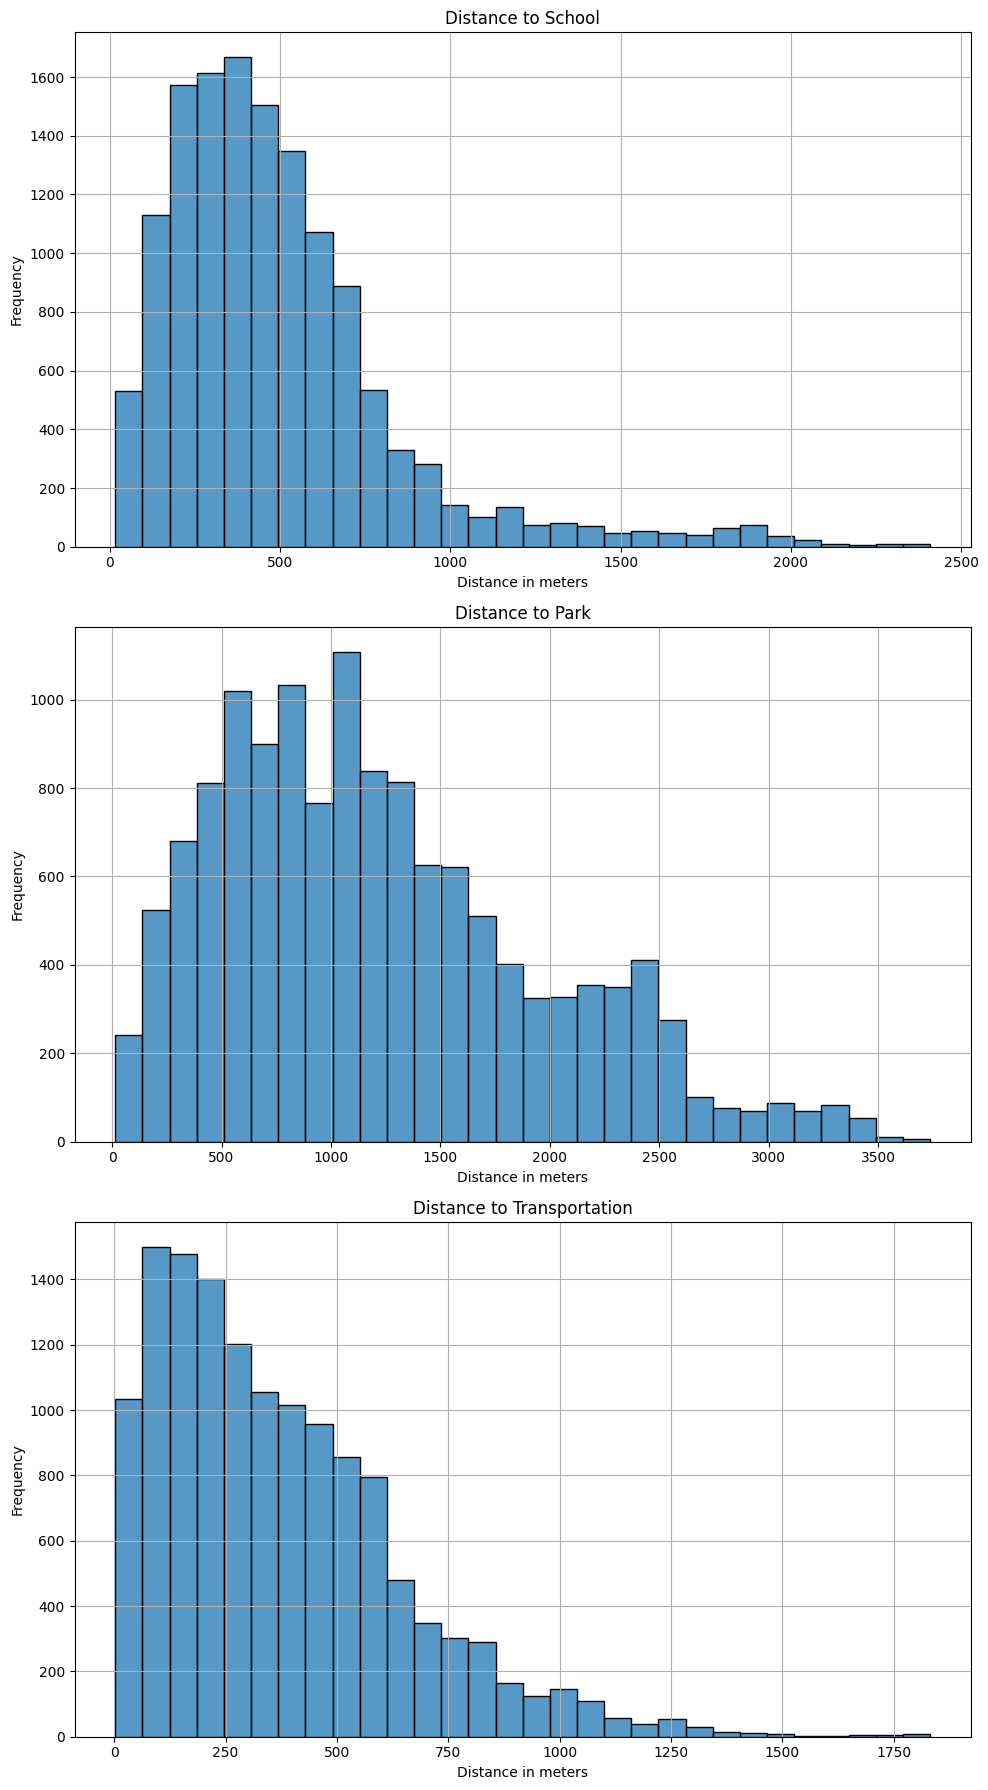

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots arranged in 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot 1: Distance to School
sns.histplot(data=filtered_df, x='dist_school_meters', bins=30, ax=axes[0])
axes[0].set_title('Distance to School')
axes[0].set_xlabel('Distance in meters')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot 2: Distance to Park
sns.histplot(data=filtered_df, x='dist_park_meters', bins=30, ax=axes[1])
axes[1].set_title('Distance to Park')
axes[1].set_xlabel('Distance in meters')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Plot 3: Distance to Transportation
sns.histplot(data=filtered_df, x='dist_transportation_meters', bins=30, ax=axes[2])
axes[2].set_title('Distance to Transportation')
axes[2].set_xlabel('Distance in meters')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
